In [1]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import load_model
from matplotlib import pyplot
from numpy import mean
from numpy import std
from numpy import array
from numpy import argmax
import numpy

In [2]:
# load models from file
def load_all_models(n_models):
    all_models = list()
    for i in range(n_models):
        # define filename for this ensemble
        filename = 'snapshot_model_' + str(i + 1) + '.h5'
        # load model from file
        model = load_model(filename)
        # add to list of members)
        all_models.append(model)
        print('> Loaded %s' % filename)
    return all_models

In [3]:
# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
    # make predictions
    yhats = [model.predict(testX) for model in members]
    yhats = array(yhats)
    # sum across ensemble members
    summed = numpy.sum(yhats, axis=0)
    # argmax across classes
    result = argmax(summed, axis=1)
    return result

In [4]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testY):
    # select a subset of members
    subset = members[:n_members]
    # make prediction
    yhat = ensemble_predictions(subset, testX)
    # calculate accuracy
    return accuracy_score(testY, yhat)

In [5]:
# generate 2d classification dataset
X, Y = make_blobs(n_samples=1100, centers=3, n_features=2,
                 cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainY, testY = Y[:n_train], Y[n_train:]

In [6]:
trainX.shape

(100, 2)

In [7]:
testX.shape

(1000, 2)

In [8]:
# load models in order
members = load_all_models(10)

W0101 16:12:21.013360  8568 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0101 16:12:21.038297  8568 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0101 16:12:21.098134  8568 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:178: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0101 16:12:21.098134  8568 deprecation_wrapper.py:119] From C:\Users\Lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:185: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0101 16:12:21.099131  8568 deprecation_wrapper.py:119] From C:

> Loaded snapshot_model_1.h5
> Loaded snapshot_model_2.h5
> Loaded snapshot_model_3.h5
> Loaded snapshot_model_4.h5
> Loaded snapshot_model_5.h5
> Loaded snapshot_model_6.h5
> Loaded snapshot_model_7.h5
> Loaded snapshot_model_8.h5
> Loaded snapshot_model_9.h5
> Loaded snapshot_model_10.h5


In [9]:
len(members)

10

In [10]:
# reverse loaded models so we build the ensemble with the last models first
members = list(reversed(members))

In [12]:
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members) + 1):
    # evaluate model with i members
    ensemble_score = evaluate_n_members(members, i, testX, testY)
    # evaluate the i'th model standalone
    testY_enc = to_categorical(testY)
    _, single_score = members[i-1].evaluate(testX, testY_enc, verbose=0)
    # summarize this step
    print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
    ensemble_scores.append(ensemble_score)
    single_scores.append(single_score)

> 1: single=0.810, ensemble=0.810
> 2: single=0.810, ensemble=0.807
> 3: single=0.807, ensemble=0.806
> 4: single=0.804, ensemble=0.808
> 5: single=0.810, ensemble=0.806
> 6: single=0.804, ensemble=0.806
> 7: single=0.809, ensemble=0.807
> 8: single=0.798, ensemble=0.808
> 9: single=0.800, ensemble=0.808
> 10: single=0.786, ensemble=0.810


In [13]:
mean(single_scores)

0.8038000000000001

In [14]:
std(single_scores)

0.007194442299441986

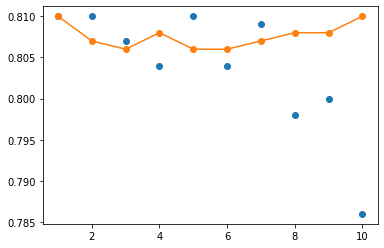

In [15]:
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members) + 1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()